# 2023-08-28 First Day
## CSCI-5636: Numerical solution of partial differential equations (PDE)

## Instructor: Jed Brown, jed.brown@colorado.edu, ECOT 824
## Meeting: Mon, Wed, Fri at 1:25-2:15p in ECCS 1B14 (and virtually)

# What are PDE?

## partial derivatives

* Gradient $\mathbf g(\mathbf x) = \nabla u(\mathbf x)$
  * scalar field to vector field
* Curl $\mathbf c(\mathbf x) = \nabla\times \mathbf g(\mathbf x)$
 * vector field to vector field
* Divergence $d(\mathbf x) = \nabla\cdot \mathbf c(\mathbf x)$
  * vector field to scalar field
* time derivatives: $\frac{\partial u(t, \mathbf x)}{\partial t}$

## what do they describe?

* heat transfer
* electrostatics, electromagnetics
* solid mechanics
* fluid mechanics
* quantum mechanics
* population dynamics

Find $u$ such that
\begin{align}
-\nabla\cdot\big(\kappa(\mathbf x) \nabla u(\mathbf x)\big) &= f(\mathbf x) & \mathbf x &\in \Omega \\
u(\mathbf x) &= g(\mathbf x) & \mathbf x &\in \Gamma_D \subset \partial\Omega \\
\kappa(\mathbf x) \nabla u(\mathbf x) \cdot \mathbf{\hat n}(\mathbf x) &= h(\mathbf x) & \mathbf x &\in \Gamma_N \subset\partial\Omega
\end{align}

# Structural mechanics

<video src="img/schwarz-pendulum.webm" autoplay loop />

<video src="img/schwarz-q2-5x5x5-t20-l2-r2.webm" autoplay loop />

# What does it mean to discretize a PDE?

Find $u$ such that
\begin{align}
-\nabla\cdot\big(\kappa(\mathbf x) \nabla u(\mathbf x)\big) &= f(\mathbf x) & \mathbf x &\in \Omega \\
u(\mathbf x) &= g(\mathbf x) & \mathbf x &\in \Gamma_D \subset \partial\Omega \\
\nabla u(\mathbf x) \cdot \mathbf{\hat n}(\mathbf x) &= h(\mathbf x) & \mathbf x &\in \Gamma_N \subset\partial\Omega
\end{align}

## How is it satisfied?
* At grid points with rules to approximate derivatives
  * Finite Difference / collocation
* A weak (integral) over elements with rules to reconstruct from element averages and define fluxes
  * Finite Volume
* A weak form over elements with solution and "test functions" in the same space
  * Finite Element / Galerkin

## How expensive is it?

* Suppose our domain is $\Omega = (0, 1)^3$

In [19]:
using Plots

# a common "good" discretiation
error(h) = min(1, 10*h^4)

function cost(h)
    n = 1/h # number of points per dimension
    N = n^3 # total number of grid points in 3D
    N
end

function cost2(h)
    N = cost(h)
    N^2
end

cost2 (generic function with 1 method)

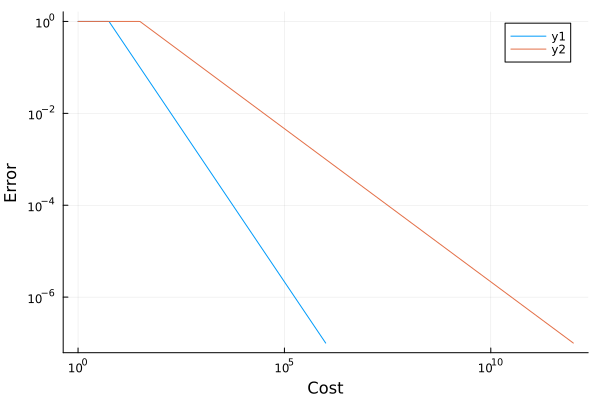

In [20]:
plot([cost, cost2], error, .01, 1, xscale=:log10, yscale=:log10,
  xlabel="Cost", ylabel="Error")

# What goes in? What comes out?

* Equations
  * Conservation
  * Variational principles
  * Materials
* Geometry
  * meshing needed?
* Boundary conditions
  * essential/Dirichlet
  * natural/Neumann
  * mixed
* Initial conditions

* Discrete solutions
  * Sampled on a grid
  * Time series
* Quantities of Interest (QoI)
  * Heat flux
  * Maximum temperature
  * Maximum stress
  * Lift, drag
* Eigensolutions
  * Resonant frequencies/modes
  * Orbitals

# Who works with PDE solvers?

* Numerical analysts
* Domain scientists and engineers
* Materials scientists
* HPC specialists
* Optimizers
* Statisticians

# What skills should they have?

Breakout groups: pick one role and make a list of essential and nice-to-have skills, plus at least one question. Pick one member to report out.

* ...

* ...

# Computer Science = Runnable Abstraction Science

## In the "grinder"
* Mathematical language and principles for each major class of method
  * What is covered by theory
  * When you're venturing off-trail
  * Analytic tools to predict and debug
* Realistic cost and exploitable structure
  * Performance on modern hardware
  * Algebraic solvers and time integrators
* Write/modify stand-alone code
* Select and use (parallel) libraries

## How can you trust the solution?
* Verification: solving the problem right
* Validation: solving the right problem

## Abstractions/collaboration
* Domain scientists, engineers
* Optimizers, statisticians
* Abstractions that reduce cognitive load
* Metrics/visualization for decisions

# On programming languages

## C
Reliable and popular for libraries (PETSc, etc.). "Simple", unsafe, capable of encapsulation.

## C++
Popular with applications and some libraries. Powerful, but complicated and unsafe.

## Fortran
The OG of numerical computing. Good for "array programming", but encapsulation is hard. Unsafe depending on dialect.

## Julia
For ground-up examples in class and in activities. Capable of high performance, expressive multiple dispatch, works well in a notebook. Library ecosystem for PDEs is limited, but rapidly improving.

## Python
Good access to JIT, libraries like FEniCS. Poor native performance, but good libraries to compiled code.

## Rust
New compiled language. Good performance, encapsulation, safety, static analysis. Poor libraries (so far).

You don't need to know any of these well and you can choose the language for your project.

# Intrinsic motivation

<img src="img/Butler1988-Table1.png" width="80%" />

# I won't grade and I won't waste your time

<div class="floatleft70"

  * I will provide feedback   
  * I will be a mentor and guide navigating this field
  * I will help you get what you want out of the class (with a dash of wholesome context)

  > My mom said, "basically, your professor is asking you to be an adult". That was too flexible.

  > In other classes, I didn’t feel like I could bounce back, but in this one I did.
</div>

<div class="floatright30">
<a href="https://www.wvupressonline.com/ungrading"><img src="img/Ungrading.jpg" width="100%" /></a>
</div>

# What about the letter grade?

* Collect a portfolio of the work and insights you're most proud of
* Individual meetings during the last week of the semester (mid-term preview)
* We'll have a conversation and you'll propose a grade based on your portfolio
  * I'll trust you.

<img src="https://dpuk71x9wlmkf.cloudfront.net/assets/2020/02/10170035/02_V4-01.jpg" />

*I can nudge upward when students are too modest -- pretty common. In rare cases, I may adjust down.*

# What I need from you: Growth Mindset

<img src="img/Henry2019-Table1.png" width="90%" />

# How will the semester look?

## Lecture periods
* Refresh, introduce, activity/group discussion, reflect
* Pointers to further resources/activities

## In-class and homework activities
* (Short) coding, experiments, presentation of results
* Use the math and programming tools of the field
* Open-ended, go further occasionally

## Learning plans
* Write, track, and revise a personal learning plan.
* Meet/chat approx weekly to check in with partner

## Projects (second half of semester)
* Dig into community software for solving PDEs
* Short presentation on how the community works
 * Key stakeholders
 * Strengths and weaknesses
* Discuss and critique

## Community contribution
* Tutorial, documentation, performance study, comparison, new features, new application
* Reflect in a short presentation

# Tools

## Git and GitHub

* GitHub CLassroom to manage repositories
* Write using notebooks and markdown
* Review using GitHub tools and nbgrader
* [Discussions](https://github.com/cu-numpde/fall23/discussions/)

## Jupyter

* RISE slides available on website
* Activities with scaffolding
* Nbgrader for writing feedback
* Works with many languages; we'll mostly use Julia
* Collaborative mode (new)

## JupyterHub: [coding.csel.io](https://coding.csel.io)
* Nothing to install, persistent storage

# A note about illnesses

* There is a new covid variant circulating.
* Updated vaccines aren't available yet.
* High-quality masks are effective.
* You're welcome to attend virtually (and please do if you have symptoms or have had exposures).

## Resources

* [CDPHE Wastewater Data](https://cdphe.maps.arcgis.com/apps/dashboards/d79cf93c3938470ca4bcc4823328946b) by county
* [State dashboard](https://covid19.colorado.gov/data)

* I have a 3yo in childcare and a 6yo in first grade.
* Illnesses circulate often and sometimes they need to stay home.
* I'll likely need to teach remotely at some times, or otherwise make it up to you

![](img/cdphe-wastewater-trends.png)

# Choices in scoping the class

## Theory

Analysis first, confirm using numerics.
Limited to simpler models.

## Applied
Numerics first, pointers to useful theory.

---

## Build from scratch

Limited to simpler models, but you'll understand everything under the hood.

## Build using libraries

More installation and software layers, but can solve more interesting problems.